# Logistic Regression

Logictic regression is a statistical method for predicting binary classes and a fundemental classification technique. It is also considered a inear classifier and is somewhat similar to polynomial and linear regression. It is considered an easy method and convenient to interpret results

|![Regression](img/img1.png) |
|:--:| 
|*Logistic Regression Example*|

In [1]:
import numpy as np
from random import choice
import numpy as np
from numpy import array, dot, random
import pandas as pd
import random
import matplotlib.pyplot as plt

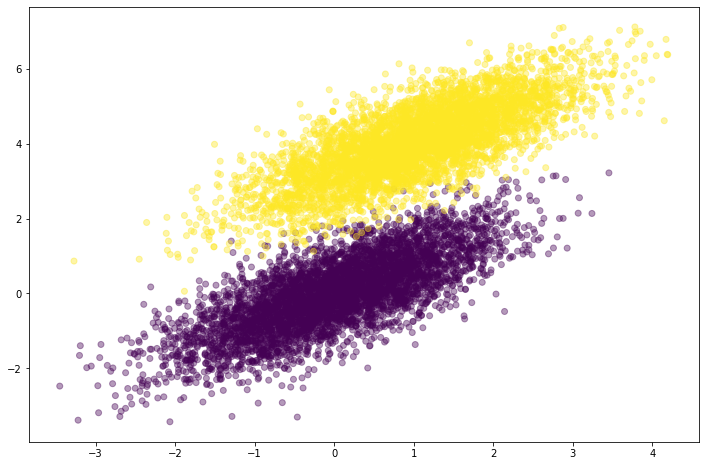

In [2]:
# GENERATING RANDOM DATA FOR TRAINING TESTING 

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

# PLOT RANDOMLY GENERATED DATA 

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],
            c = Y, alpha = .4)
plt.show()

In [3]:
'''
    Logistic Model
'''

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
def hx(w, X):
    z = np.array(w[0] + w[1]*np.array(X[:,0]) + w[2]*np.array(X[:,1]))
    return sigmoid(z)

In [5]:
'''
    Defining the costt function
'''


def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y * np.log(y_pred) + (1-Y)*np.log(1-y_pred))

In [6]:
'''
    Gradient Descent:
        Defining partial derivitives
'''

def grad(w, X, Y):
    y_pred = hx(w, X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    
    return g
    

In [7]:
'''
    Updating our weights,
     - print our first weights
     - w_prev, w_new - to update our weights
     - lr - learning rate
'''


def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j = 0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if(w_new[0]-w_prev[0] ** 2) + (w_new[1] - w_prev[1]) ** 2 + (w_new[2] - w_prev[2]) ** 2 < pow(10,-6):
            return w_new
        
        #counting the iterations
        if j > 100:
            return w_new
        
        j+=1
            

In [8]:
w = [1,1,1]

In [9]:
'''
    Training the model
'''

w = descent(w, w, .00001)
print(w)

[1, 1, 1]
8178.35059757939
[0.967692056325071, 0.98652879022672, 0.9885257391164642]
8043.074854451746
[0.967692056325071, 0.98652879022672, 0.9885257391164642]


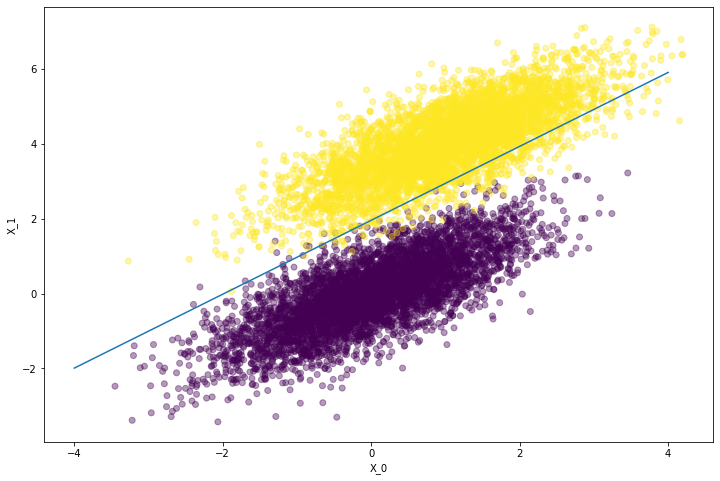

In [10]:
'''
    Displaying updated graph after training the model. 
'''

def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

def formula_1(x):
    return (w[0] + w[1] * x + w[2])
    

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],
            c = Y, alpha = .4)
graph(formula_1, range(-4, 5))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

### References

#### 1. https://blog.goodaudience.com/machine-learning-using-logistic-regression-in-python-with-code-ab3c7f5f3bed
#### 2. https://realpython.com/logistic-regression-python/